# __Immigration__

### Importing required libraries

In [1]:
#Run this only once
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer as Counter
from sklearn.feature_extraction import text as TExT
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# Immigration is divided into _four_ subcategories: 

# __2. Passport:__

In [3]:
#Importing dataset
df = pd.read_csv("/Users/harshith/Downloads/Week 3 - New/Immigration/passport.csv")
df.head()

,full_text,sentiment
0,stopped from leaving india at bangalore airpor...,Negative
1,sos my wife with chinese passport and valid o...,Positive
2,mam indian passport valid more than 5 months ...,Positive
3,my own experience earlier this month at bangal...,Negative
4,desi british passport holder they always comm...,Neutral


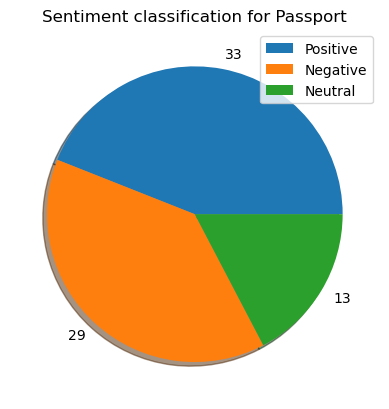

In [4]:
#Counting different sentiments
val = df['sentiment'].value_counts()
sentiments = val.index
pass_count = val.values

#Plotting a pie chart
plt.pie(pass_count, labels = pass_count, shadow= True)
plt.title("Sentiment classification for Passport")
plt.legend(labels=sentiments)
plt.show()

## a.Topic modelling and wordcloud for positive tweets regarding Passport:

### Topic Modelling

In [5]:
##Topic Modelling
#Extracting Positive tweets
positive_reviews = df[df.sentiment == "Positive"]

#Combining reviews into a list
positive_reviews = positive_reviews['full_text'].tolist()

#Creating custom stop words
custom = ["wife","thank","amp","asked"]
#Adding custom stopwords to predefined list of stopwords
stop_words = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 2,stop_words = stop_words)
V = vector.fit_transform(positive_reviews)

#Appyling LDA for Topic modelling
n_topic = 15
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 10
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: boarding, security, day, nice, mumbai, need, bangkok, card, quite, delhi
Topic 2: need, valid, number, indian, id, days, months, 30, check, thailand
Topic 3: left, card, home, driver, oci, pass, officer, today, isn, hand
Topic 4: indian, day, customs, help, hand, look, officer, like, security, india
Topic 5: immigration, rpo, help, like, sent, seen, security, day, customs, hand
Topic 6: years, check, seen, security, customs, look, bags, checked, ticket, help
Topic 7: help, thailand, validity, ticket, thanks, day, customs, hand, look, officer
Topic 8: look, rpo, visited, does, hyderabad, address, lost, officer, sent, like
Topic 9: travel, need, sent, valid, traveling, indian, bangkok, 30, days, months
Topic 10: thanks, hand, today, quite, pass, checked, boarding, help, day, customs
Topic 11: nightmare, day, customs, help, hand, look, officer, indian, like, security
Topic 12: day, best, mumbai, isn, lost, delhi, customs, help, hand, look
Topic 13: security, day, customs, help, h

/Users/harshith/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Word Cloud

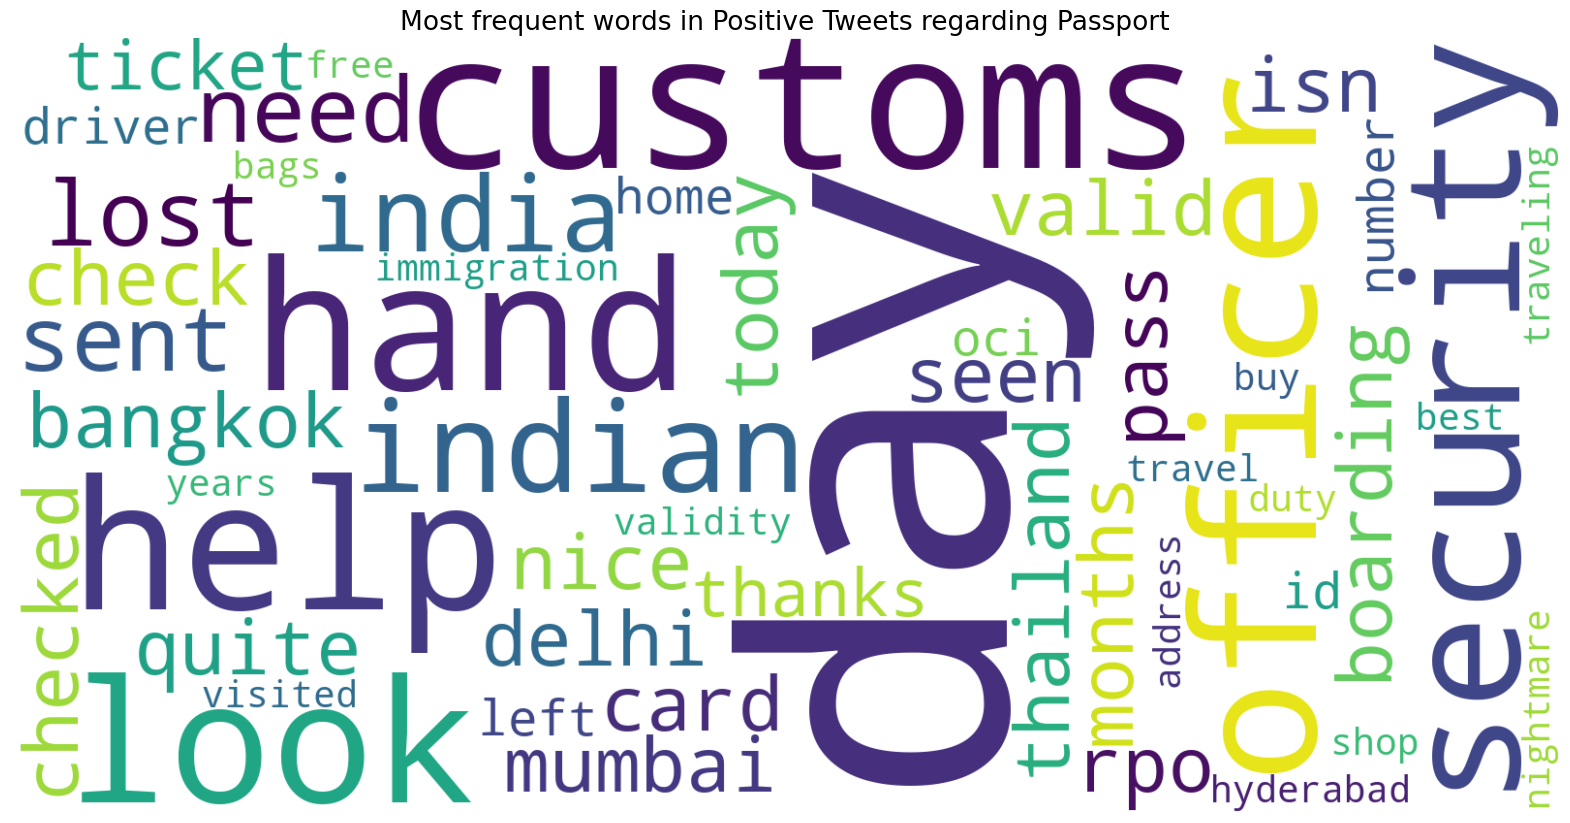

In [7]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Positive Tweets regarding Passport', fontsize=19)
plt.show()

### Observation 1: Positive notes regarding passport
#### 1. Foreigners tweeted about losing their passports at the airport thank the CIRF for finding it
#### 2. Other staff is quite helpful throughout the immigration process
#### 3. Bangalore airport having a separate line for India passport holders has made the process easier

## b.Topic modelling and wordcloud for negative tweets regarding passport:

### Topic Modelling

In [8]:
##Topic Modelling
#Extracting Positive tweets
negative_reviews = df[df.sentiment == "Negative"]

#Combining reviews into a list
negative_reviews = negative_reviews['full_text'].tolist()

#Creating custom stop words
custom = ["forgotten","airport","bucks","trailer","liqour"]
#Adding custom stopwords to predefined list of stopwords
stop = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 2,stop_words = stop)
V = vector.fit_transform(negative_reviews)

#Appyling LDA for Topic modelling
n_topic = 7
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 10
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: immigration, asked, details, officer, stamp, received, provided, traveling, boarding, security
Topic 2: counter, time, impounded, money, madam, pls, old, details, trip, 30
Topic 3: control, indian, day, fake, ago, saying, long, 30, copy, got
Topic 4: india, trip, court, stopped, got, control, leaving, specifically, list, exit
Topic 5: immigration, hello, son, documents, aadhar, getting, status, having, check, old
Topic 6: travel, authority, check, month, allowed, impounded, holder, visa, usa, saying
Topic 7: stuck, unprofessional, plane, 30, security, delhi, today, officer, india, immigration


### Word Cloud

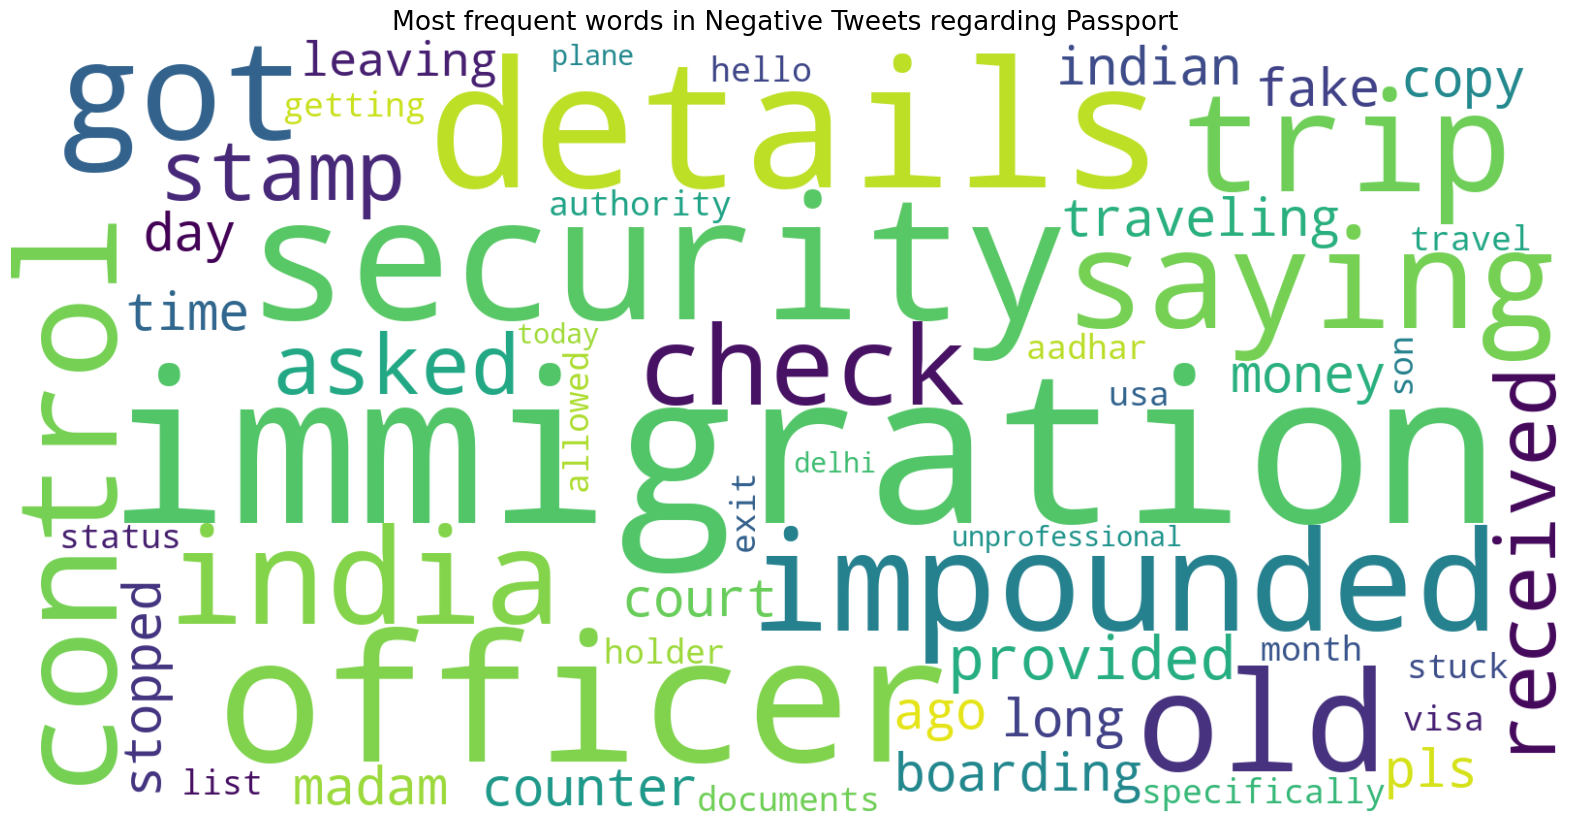

In [9]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Negative Tweets regarding Passport', fontsize=19)
plt.show()

### Observation 2: Negative notes regarding passport
#### 1. People holding foreign passports are often harassed by customs
#### 2. Passport control officers often pick people for screening on a bias
#### 3. People have had their Passport  impounded for silly reasons